In [1]:
import tensorflow as tf
tf.__version__
import keras
from tensorflow.keras.callbacks import TensorBoard

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train), (x_test,y_test) =mnist.load_data()

In [4]:
print("training data shape is {}", format(x_train.shape))
print("training label shape is {}", format(y_train.shape))
print("testing data shape is {}", format(x_test.shape))
print("testing label shape is {}", format(y_test.shape))

training data shape is {} (60000, 28, 28)
training label shape is {} (60000,)
testing data shape is {} (10000, 28, 28)
testing label shape is {} (10000,)


In [5]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\KIIT\anaconda3\envs\tensorflow

  added / updated specs:
    - matplotlib


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2020.12.8-haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py38ha~ --> pkgs/main::certifi-2020.12.5-py38haa95532_0
  openssl            conda-forge::openssl-1.1.1i-h8ffe710_0 --> pkgs/main::openssl-1.1.1i-h2bbff1b_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [6]:
import matplotlib.pyplot as plt

In [7]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

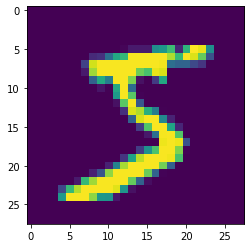

In [8]:
plt.imshow(x_train[0])


In [9]:
print("sample training label is ", format(y_train[0:1]))

sample training label is  [5]


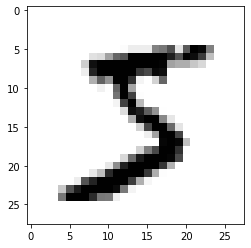

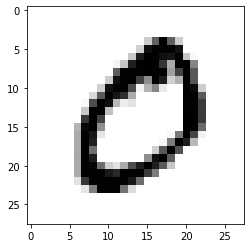

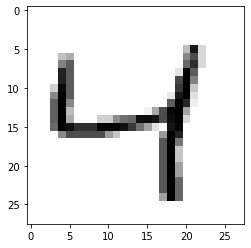

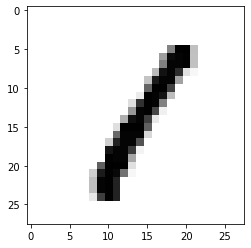

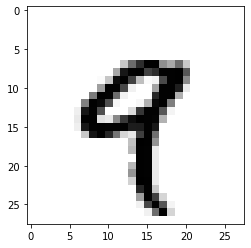

In [10]:
for i in range(0,5):
    plt.imshow(x_train[i], cmap= plt.cm.binary)
    plt.show()

In [11]:
x_train=  tf.keras.utils.normalize(x_train,axis=1)
x_test=  tf.keras.utils.normalize(x_test,axis=1)

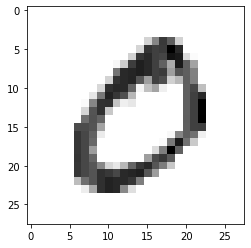

In [12]:
plt.imshow(x_train[1], cmap= plt.cm.binary)

In [13]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
model= tf.keras.models.Sequential()

In [15]:
model.add(tf.keras.layers.Flatten())

In [16]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [17]:
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1094 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0748 - accuracy: 0.9766


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 750us/step - loss: 0.0977 - accuracy: 0.9692
0.09774641692638397 0.9692000150680542


In [20]:
model.save('num_read')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_read\assets


In [21]:
new_model= tf.keras.models.load_model('num_read')

In [22]:
predictions= new_model.predict(x_test)
print(predictions)

[[1.4369439e-11 1.4253123e-08 1.0235493e-06 ... 9.9999630e-01
  7.0192168e-09 4.6643245e-09]
 [2.4133628e-09 5.1807615e-06 9.9999464e-01 ... 9.7503970e-11
  5.6162364e-09 5.5144379e-14]
 [2.4000383e-07 9.9979299e-01 1.9785904e-05 ... 8.6212276e-05
  4.6697944e-05 1.8134684e-06]
 ...
 [4.0853001e-09 9.9091096e-08 7.0587824e-08 ... 1.8177716e-05
  1.2386736e-06 1.3095960e-04]
 [1.6469521e-06 1.8292288e-06 6.9251179e-08 ... 1.3175780e-06
  5.3580577e-04 5.8436481e-08]
 [8.1401987e-07 2.1191896e-08 4.7324539e-07 ... 2.4761357e-10
  1.9012215e-07 6.3928622e-09]]


In [23]:
import numpy as np
print(np.argmax(predictions[0]))

7


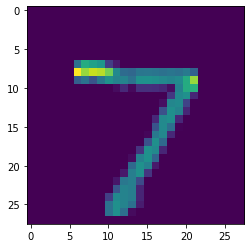

In [24]:
plt.imshow(x_test[0])
plt.show()

In [25]:
print(np.argmax(predictions[1]))

2


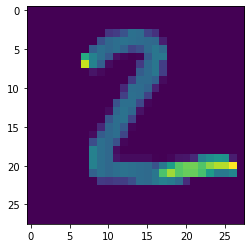

In [26]:
plt.imshow(x_test[1])
plt.show()

In [27]:
print(np.argmax(predictions[6]))

4


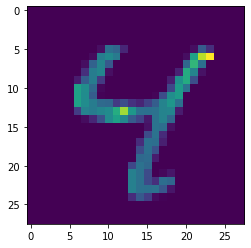

In [28]:
plt.imshow(x_test[6])
plt.show()

In [29]:
conda install -c conda-forge opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\KIIT\anaconda3\envs\tensorflow

  added / updated specs:
    - opencv


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.12.8-~ --> conda-forge::ca-certificates-2020.12.5-h5b45459_0
  certifi            pkgs/main::certifi-2020.12.5-py38haa9~ --> conda-forge::certifi-2020.12.5-py38haa244fe_0
  openssl              pkgs/main::openssl-1.1.1i-h2bbff1b_0 --> conda-forge::openssl-1.1.1i-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [30]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal

In [31]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [32]:
from IPython.display import HTML

main_text = """
<video id="video" width="320" height="240" autoplay></video>
<button id="snap">Snap Photo</button>
<canvas id="canvas" width="320" height="240"></canvas>

<script>
// Grab elements, create settings, etc.
var video = document.getElementById('video');

// Get access to the camera!
if(navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
    // Not adding `{ audio: true }` since we only want video now
    navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
        //video.src = window.URL.createObjectURL(stream);
        //video.play();
        video.srcObject=stream;
        video.play();
    });
}

// Elements for taking the snapshot
var canvas = document.getElementById('canvas');
var context = canvas.getContext('2d');
var video = document.getElementById('video');

// Trigger photo take
document.getElementById("snap").addEventListener("click", function() {
	context.drawImage(video, 0, 0, 320, 240);
    var myCanvas = document.getElementById('canvas');
    var image = myCanvas.toDataURL("image/png");
    IPython.notebook.kernel.execute("print('testing')")
    IPython.notebook.kernel.execute("image = '" + image + "'")
});
</script>

"""
HTML(main_text)

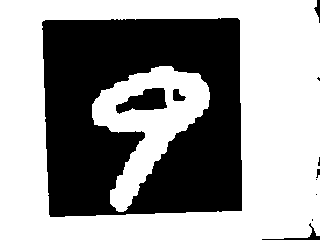

In [46]:
from PIL import Image
import base64
import io
pil_im = Image.open(io.BytesIO(base64.b64decode(image.split(',')[1])))
pil_im
gray= pil_im.convert('L')
bw= gray.point(lambda x: 0 if x<100 else 255,'1')
bw.save("bw_image.jpg")
bw


76800


<IPython.core.display.Javascript object>


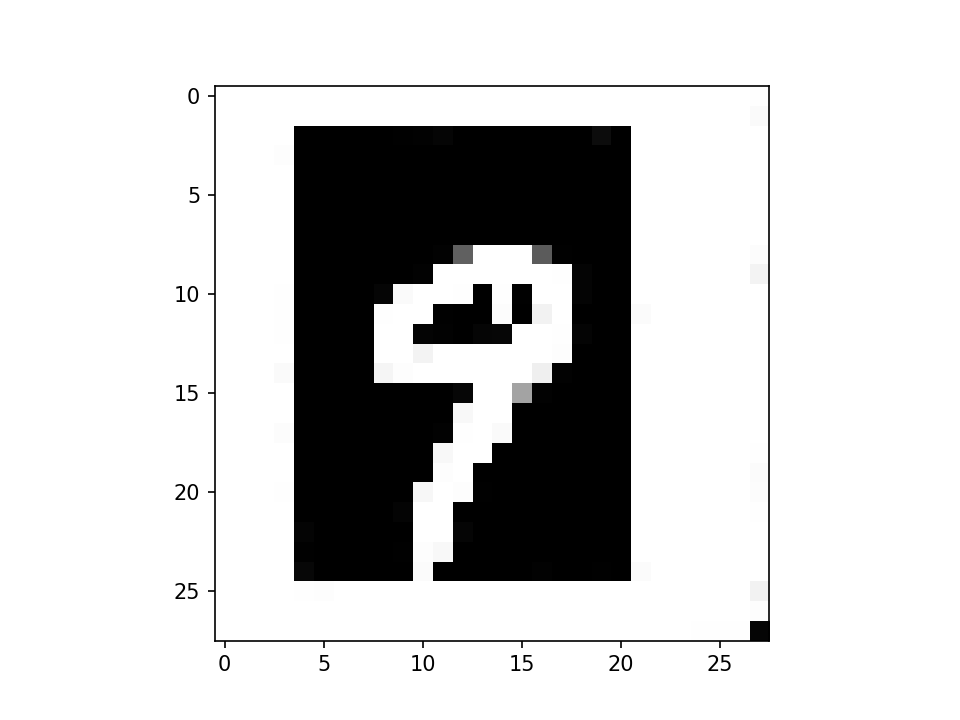

784


In [47]:
img_array= cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array= cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array,cmap=plt.cm.binary)
plt.show()
img_size=28
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap=plt.cm.binary)
plt.show()
print(new_array.size)

In [48]:
user_test =  tf.keras.utils.normalize(new_array,axis=1)
user_test=user_test.reshape(-1,img_size,img_size) 
predictions= model.predict(user_test)
a=predictions[0][0]
for i in range(0,10):
    b=predictions[0][i]
    print("prob. distr. for",i,b)


prob. distr. for 0 0.016771521
prob. distr. for 1 0.0004096806
prob. distr. for 2 0.8142975
prob. distr. for 3 0.085637435
prob. distr. for 4 0.00016085446
prob. distr. for 5 0.00033867394
prob. distr. for 6 0.05555079
prob. distr. for 7 0.00012708652
prob. distr. for 8 0.026449943
prob. distr. for 9 0.00025644433


In [49]:
print("the predicted value is",np.argmax(predictions[0]))

the predicted value is 2
